# Ploynomial Regression with sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # so that random values are always repeated
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Defining dataset

original polynom is $-x^2 + 1$

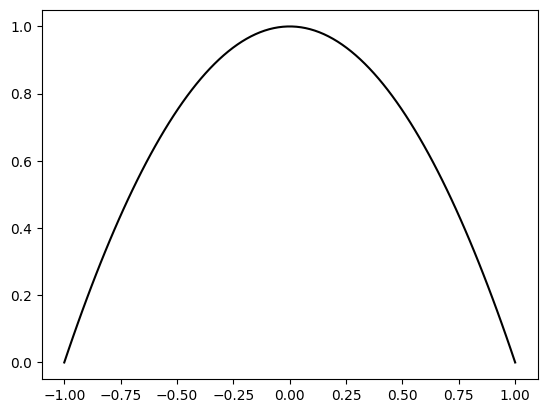

In [3]:
coefs = [1, 0, -1] # the coefficients at x^0, x^1, x^2

# calculate y for input x
def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i] * x ** i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 100)
    plt.plot(x, polynomial(coefs = coefs, x = x), linestyle = '-', color = 'black')

draw_polynomial(coefs)

## Creating dataset close to this polynomial

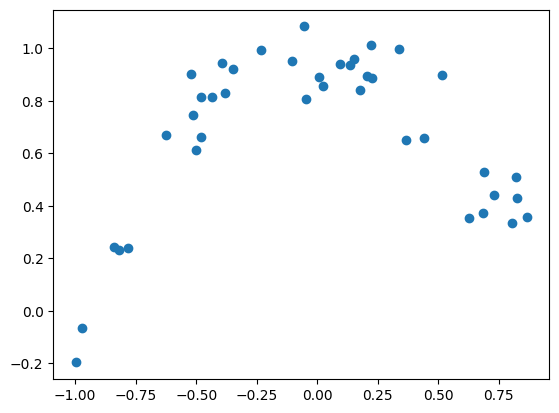

In [4]:
X = [] # x - general features
Y = []
for i in range(40):
    x = random.uniform(-1, 1) # for float generating instead of an integer
    y = polynomial(coefs, x) + random.gauss(0, 0.1) # generate noise with gaussian distribution
    X.append(x)
    Y.append(y)
    
plt.scatter(X, Y)

## The overfitting example

In [5]:
from func import *

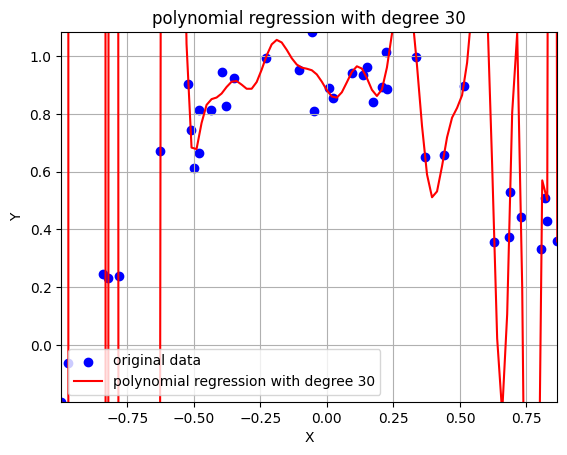

ploynomial regression with degree 30 has coefficients: [-1.42880191e+09 -1.47643701e+00  1.04885582e+01  3.24278116e+02
 -1.95377338e+02 -2.53689855e+04 -1.58321706e+04  8.73826392e+05
  8.00706639e+05 -1.61597059e+07 -1.56099542e+07  1.81697276e+08
  1.68189974e+08 -1.33658797e+09 -1.13273740e+09  6.70891536e+09
  5.07297739e+09 -2.34847025e+10 -1.56370930e+10  5.77239310e+10
  3.37718373e+10 -9.89413783e+10 -5.12988997e+10  1.15531232e+11
  5.40753567e+10 -8.74471649e+10 -3.79509091e+10  3.86361195e+10
  1.60502569e+10 -7.55928301e+09 -3.10667693e+09]
ploynomial regression with degree 30 has intercept: 1428801905.9946


In [6]:
degree = 30

wieghts_degree, intercept_degree = train_plot_reg(X, Y, degree)
print(f'ploynomial regression with degree {degree} has coefficients: {wieghts_degree}')
print(f'ploynomial regression with degree {degree} has intercept: {intercept_degree}')

## Split data into training ad testing


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 52) # 80% for training, 20% for testing
# random_state = 52 for reproducibility

print(f'X_train shape: {np.shape(X_train)}')
print(f'X_train: {X_train[:5]}')
print(f'Y_train shape: {np.shape(Y_train)}')
print(f'X_test shape: {np.shape(X_test)}')
print(f'Y_test shape: {np.shape(Y_test)}')


X_train shape: (32,)
X_train: [-0.512178246225736, -0.04680609169528838, 0.8043319008791654, -0.4989873172751189, -0.055714569094573285]
Y_train shape: (32,)
X_test shape: (8,)
Y_test shape: (8,)


## Training a polynomial regression model with no regularization

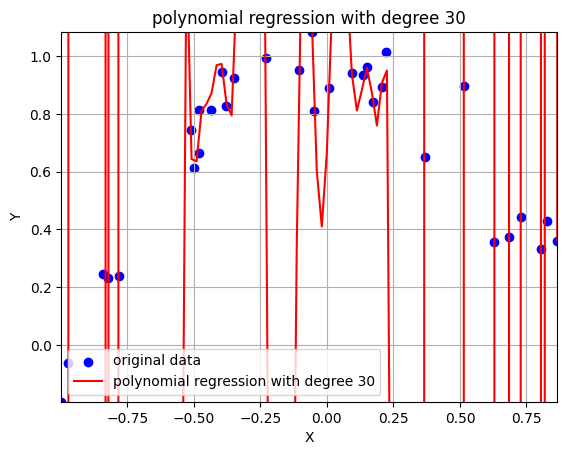

(array([ 6.22442067e+12,  2.26654415e+01,  3.36375483e+02, -8.76303093e+03,
       -4.70821768e+04,  1.01847800e+06,  2.28777724e+06, -4.92526064e+07,
       -7.49896413e+07,  1.25509760e+09,  1.90673291e+09, -1.85116110e+10,
       -3.23788398e+10,  1.63345367e+11,  3.35480449e+11, -8.77356576e+11,
       -2.13471329e+12,  2.86440785e+12,  8.59548382e+12, -5.36804718e+12,
       -2.23324528e+13,  4.23801890e+12,  3.73874434e+13,  3.34150130e+12,
       -3.90867710e+13, -1.07379520e+13,  2.34548431e+13,  9.26031743e+12,
       -6.46604316e+12, -2.87891501e+12,  2.65291532e+11]), -6224420673654.419)


In [8]:
coefficients_intercept = train_plot_reg(X_train, Y_train, degree)
print(coefficients_intercept)


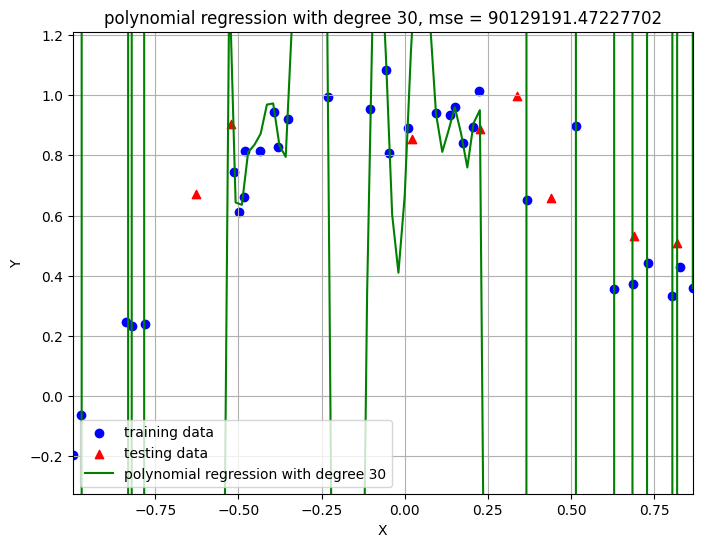

square loss: 90129191.47227702


In [9]:
square_loss = predict_evaluate(coefficients_intercept, degree, X_train, Y_train, X_test, Y_test)
print(f'square loss: {square_loss}')

## Lasso regularization

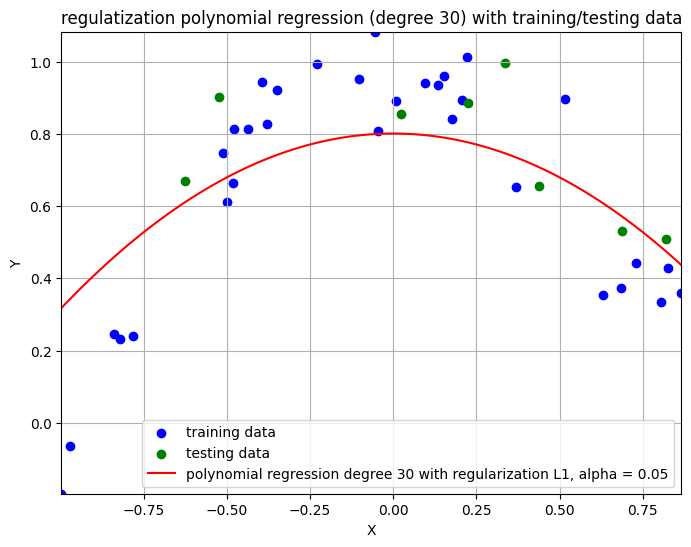

RMSE with L1 regularization degree 30 and alpha = 0.05: 0.13341946757921055


In [10]:
alpha = 0.05 # example value lvl

# train with L1 regularization
rmse_lasso = train_plot_regular_reg(X_train, Y_train, X_test, Y_test, degree, 'L1', alpha = alpha)
print(f'RMSE with L1 regularization degree {degree} and alpha = {alpha}: {rmse_lasso}')

## Ridge regularization

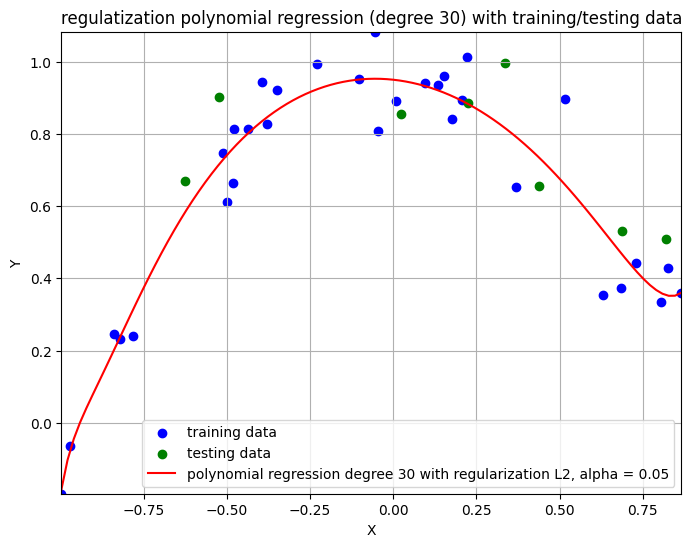

RMSE with L2 regularization degree 30 and alpha = 0.05: 0.12191671123571657


In [11]:
rmse_ridge = train_plot_regular_reg(X_train, Y_train, X_test, Y_test, degree, 'L2', alpha = alpha)
print(f'RMSE with L2 regularization degree {degree} and alpha = {alpha}: {rmse_ridge}')